<a href="https://colab.research.google.com/github/FGalvao77/Deploy-classification-model/blob/main/Deploy_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deploy classification model**
---
---

#### **1. Importando as bibliotecas e carregando os dados**
---



In [ ]:
# importando as bibliotecas iniciais
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_classification

# configurando ambiente 
np.random.seed(0)
np.set_printoptions(precision=2)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# utilizando a função "make_classification" para gerar dados sintéticos
# 15.000 observações com 5 atributos
rng = np.random.RandomState(0)
X, y = make_classification(n_samples=15_000, n_features=5, random_state=rng)

In [ ]:
# dimensão dos objetos
X.shape, y.shape

((15000, 5), (15000,))

In [ ]:
# visualizando algumas amostras dos dados "X" e "y"
print(f'X:\n{X[:10]} \n\ny:\n{y[:10]}')

X:
[[ 1.31  0.09  0.47 -0.81  1.48]
 [-1.36 -1.94  1.45 -0.4   1.03]
 [ 0.67  1.34 -0.13  0.45 -1.03]
 [ 1.18  1.32 -0.47  0.1  -0.38]
 [-1.42 -1.95 -0.42 -0.37  0.96]
 [ 1.05  0.13 -0.36 -0.61  1.11]
 [-0.32  0.56  0.26  0.6  -1.18]
 [-1.84 -0.67  0.43  0.78 -1.34]
 [-1.74 -0.73 -1.34  0.67 -1.13]
 [-2.27 -2.8   1.91 -0.37  1.09]] 

y:
[1 0 1 0 0 1 1 0 0 0]


#### **2. Tratando os dados, treinando e avaliando os modelos**
---
---

> Vamos utilizar três modelos de classificação:<br>
- _Random Forest_;
- _Logist Regression_ e,
- _MLP_ (RNA - Multi-layer Percepton).

In [ ]:
# importando a função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split as tts

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5, random_state=1527, stratify=y)

In [ ]:
# importando as funçoes "random forest", " logist regression" e "mlp"
from sklearn.ensemble import RandomForestClassifier     # floresta randômica
from sklearn.linear_model import LogisticRegression     # regressão logística
from sklearn.neural_network import MLPClassifier        # rede neural - multi-layer percepton

# importando as funções de métricas
from sklearn.metrics import classification_report, recall_score, precision_score

# importando a função para visualização gráfica do relatório das métricas do modelo
from yellowbrick.classifier import ClassificationReport

In [ ]:
# instanciando o modelo de floresta randômica
clf_RFC = RandomForestClassifier(n_estimators=1_500, random_state=1527, n_jobs=-1)

# treinando o modelo
mdl_RFC = clf_RFC.fit(X_train, y_train)

# realizando a predição com o modelo após seu treinamento
pred_RFC = mdl_RFC.predict(X_test)

# visualizando o relatório das métricas do modelo
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3760
           1       0.93      0.91      0.92      3740

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500



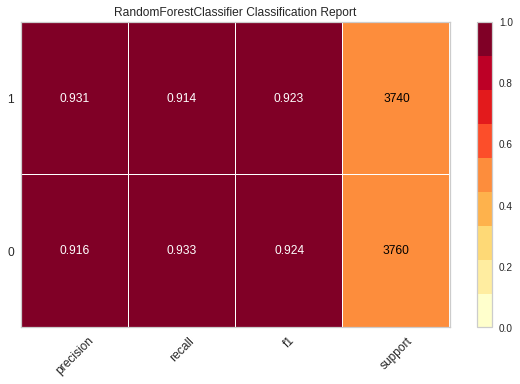

In [ ]:
# visualizando graficamente o relatório das métricas do modelo da floresta randômica
viz = ClassificationReport(
    RandomForestClassifier(n_estimators=1_500, random_state=1527, n_jobs=-1), 
    cmap='YlOrRd', support=True
)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
# criando um dicionário para salvar as métricas do modelo
model_metricsRFC = dict()

# instanciando as métricas do modelo no dicionário
model_metricsRFC['recall'] = round(recall_score(y_test, pred_RFC), 4)
model_metricsRFC['precision'] = round(precision_score(y_test, pred_RFC), 4)

# visualizando as métricas
model_metricsRFC

{'precision': 0.9311, 'recall': 0.9144}

In [ ]:
# instanciando o modelo de regressão logística
clf_LR = LogisticRegression(random_state=1527, n_jobs=-1)

# treinando o modelo
mdl_LR = clf_LR.fit(X_train, y_train)

# realizando a predição com o modelo após seu treinamento
pred_LR = mdl_LR.predict(X_test)

# visualizando o relatório das métricas do modelo
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3760
           1       0.85      0.94      0.89      3740

    accuracy                           0.88      7500
   macro avg       0.89      0.88      0.88      7500
weighted avg       0.89      0.88      0.88      7500



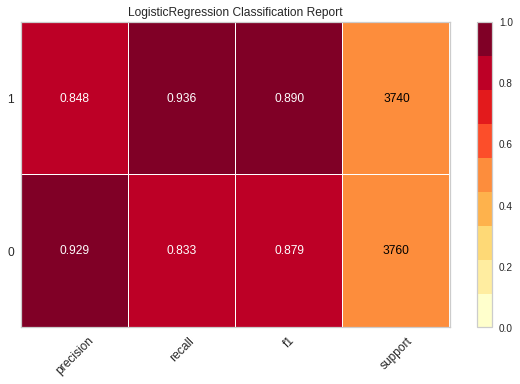

In [ ]:
# visualizando graficamente o relatório das métricas do modelo de regressão logística
viz = ClassificationReport(
    LogisticRegression(random_state=1227, n_jobs=-1), 
    cmap='YlOrRd', support=True
)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
# criando um dicionário para salvar as métricas do modelo
model_metricsLR = dict()

# instanciando as métricas do modelo no dicionário
model_metricsLR['recall'] = round(recall_score(y_test, pred_LR), 4)
model_metricsLR['precision'] = round(precision_score(y_test, pred_LR), 4)

# visualizando as métricas
model_metricsLR

{'precision': 0.8479, 'recall': 0.9364}

In [ ]:
# instanciando o modelo de rede neural do tipo multi-layer percepton
clf_MLP = MLPClassifier(max_iter=1_500, random_state=1527)

# treinando o modelo
mdl_MLP = clf_MLP.fit(X_train, y_train)

# realizando a predição com o modelo após seu treinamento
pred_MLP = mdl_MLP.predict(X_test)

# visualizando o relatório das métricas do modelo
print(classification_report(y_test, pred_MLP))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3760
           1       0.92      0.93      0.92      3740

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500



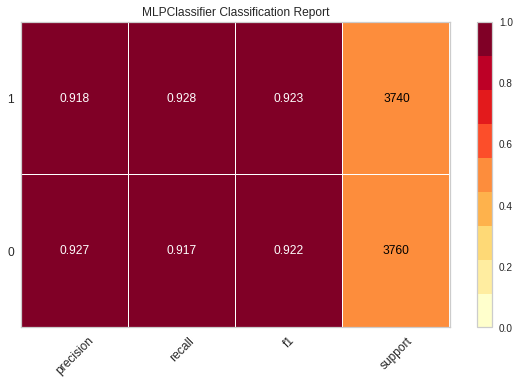

In [ ]:
# visualizando graficamente o relatório das métricas do modelo de rede neural do tipo multi-layer percepton
viz = ClassificationReport(
    MLPClassifier(max_iter=1_500, random_state=1527), 
    cmap='YlOrRd', support=True
)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
# criando um dicionário para salvar as métricas do modelo
model_metricsMLP = dict()

# instanciando as métricas do modelo no dicionário
model_metricsMLP['recall'] = round(recall_score(y_test, pred_MLP), 4)
model_metricsMLP['precision'] = round(precision_score(y_test, pred_MLP), 4)

# visualizando as métricas
model_metricsMLP

{'precision': 0.9175, 'recall': 0.9278}

In [ ]:
# visualizando as métricas dos modelos
print( 
        '                   MODELS METRICS',
    '+' * 60,
    f'Random Forest:     {model_metricsRFC}', 
    f'Logist Regression: {model_metricsLR}', 
    f'MLP:               {model_metricsMLP}', 
    '+' * 60,
    sep='\n')

                   MODELS METRICS
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest:     {'recall': 0.9144, 'precision': 0.9311}
Logist Regression: {'recall': 0.9364, 'precision': 0.8479}
MLP:               {'recall': 0.9278, 'precision': 0.9175}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### **3. Preparando os dados para o _deploy_**
---
---

In [ ]:
# criando pastas: "metrics", "models" e "templates"
!mkdir metrics      # para salvar as métricas do modelos
!mkdir models       # para salvar os modelos
!mkdir templates    # para salvar o template/home

In [ ]:
# salvando as métricas em arquivo do tipo "json" na pasta "metrics"
import json

with open('metrics/model_metrics_version_RFC.json', 'w') as fp:
    json.dump(model_metricsRFC, fp)

with open('metrics/model_metrics_version_LR.json', 'w') as fp:
    json.dump(model_metricsLR, fp)

with open('metrics/model_metrics_version_MLP.json', 'w') as fp:
    json.dump(model_metricsMLP, fp)

In [ ]:
# salvando as métricas na pasta "models"
from joblib import dump, load

print(
    dump(mdl_RFC, 'models/mdl_RFC.joblib'),
    dump(mdl_LR, 'models/mdl_LR.joblib'),
    dump(mdl_MLP, 'models/mdl_MLP.joblib'), sep='\n'
    ) 

['models/mdl_RFC.joblib']
['models/mdl_LR.joblib']
['models/mdl_MLP.joblib']


```html
<!-- arquivo home.html -->
<h1 style="text-align: center;"><strong>Deploy APP</strong><span style="color: #0000ff;">-</span> Data Science PRO</h1>
<h2 style="text-align: center;"><strong>API - Previsão</strong></h2>
<p style="text-align: center;">&nbsp;</p>
<p style="text-align: center;">&nbsp;</p>
<h2 style="text-align: center;">INSIRA OS DADOS<span style="color: #0000ff;">.</span></h2>

<div class="login">
    
<form action="{{url_for('predict')}}" method='POST'>
<h3 style="text-align: center;"><strong>Dado 1: </strong><input type="text" name="x1" placeholder="dado 1" required="required"/>.</h3>
<h3 style="text-align: center;"><strong>Dado 2: </strong><input type="text" name="x2" placeholder="dado 2" required="required"/>.</h3>
<h3 style="text-align: center;"><strong>Dado 3: </strong><input type="text" name="x3" placeholder="dado 3" required="required"/>.</h3>
<h3 style="text-align: center;"><strong>Dado 4: </strong><input type="text" name="x4" placeholder="dado 4" required="required"/>.</h3>
<h3 style="text-align: center;"><strong>Dado 5: </strong><input type="text" name="x5" placeholder="dado 5" required="required"/>.</h3>
<h3 style="text-align: center;"><button type="submit" class="btn btn-primary btn-block btn-large"><strong>CLIQUE AQUI!</strong></button></h1>
</form>
 

<p style="text-align: center;">&nbsp;</p>
<h2 style="text-align: center;"><strong>PREDIÇÕES</strong>&nbsp;</h2>
.<p style="text-align: center;"><strong>1o model | </strong><strong>{{pred_RFC}}</strong> <span style="color: #0000ff;">.</span></p>
.<p style="text-align: center;"><strong>2o model | </strong><strong>{{pred_LR}}</strong> <span style="color: #0000ff;">.</span></p>
.<p style="text-align: center;"><strong>3o model | </strong><strong>{{pred_MLP}}</strong> <span style="color: #0000ff;">.</span></p>

```

In [ ]:
# criar o arquivo "app.py" para realizar o deploy do modelo
from joblib import dump, load
from flask import Flask, request, url_for, redirect, render_template, jsonify
import numpy as np
import pandas as pd
import json
import warnings
warnings.filterwarnings('ignore')

# models
model_RFC = load('models/mdl_RFC.joblib')
model_LR = load('models/mdl_LR.joblib')
model_MLP = load('models/mdl_MLP.joblib')

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict', methods=['POST'])
def predict():
    # request of all inputs
    features = [x for x in request.form.values()]
    
    # data preparing
    features_array = np.array(features)
    pandas_features = pd.DataFrame([features_array])

    print('features: ', features)
    print('features_array: ', features_array)
    
    # predict
    pred_RFC = model_RFC.predict(pandas_features)
    print(f'Random Forest: {pred_RFC}')

    pred_LR = model_LR.predict(pandas_features) 
    print(f'Logist Regression: {pred_LR}')

    pred_MLP = model_MLP.predict(pandas_features)
    print(f'MLP: {pred_MLP}')

    prediction_RFC = int(pred_RFC[0])
    prediction_LR = int(pred_LR[0])
    prediction_MLP = int(pred_MLP[0])

    return render_template('home.html', 
                            pred_RFC = 'prediction Random Forest: {}'.format(prediction_RFC),
                            pred_LR= 'prediction Logist Regression: {}'.format(prediction_LR),
                            pred_MLP = 'prediction MLP [RNA - Multi-layer Percepton]: {}'.format(prediction_MLP)
                            )

@app.route('/model_health/<model_id>', methods=['GET'])
def model_health(model_id):
    with open('metrics/model_metrics_version_{0}.json'.format(model_id)) as f:
        model_metrics = json.load(f)    
        return model_metrics

if __name__ == '__main__':
    app.debug = True
    app.run()

#### **4. Outros**
---
---

In [ ]:
# instalando session_info para salvar as versões das bibliotecas/funções utilizadas no notebook.
!pip install session_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=eb5c833f70c35c9b7faa7a8ec9fc7e481af90e75a4a63e4834d0ea14c7de53da
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [ ]:
# importando a biblioteca
import session_info as si

# visualizando as versões das bibliotecas e/ou funções utilizadas no notebook
si.show(html=False)

-----
joblib              1.1.0
matplotlib          3.2.2
numpy               1.21.6
session_info        1.0.0
sklearn             1.0.2
yellowbrick         1.4
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.11.1
notebook            5.3.1
-----
Python 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-08-02 11:02


In [ ]:
# instalando a biblioteca "watermark"
!pip install -q -U watermark 
# essa biblioteca é usado para gravar as versões dos pacotes usados neste notebook

In [ ]:
# versões das bibliotecas utilizadas nesse notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | Deploy classification model #Mentorama 2022' --iversions

Author: Fernando Galvão | Deploy classification model #Mentorama 2022

numpy       : 1.21.6
session_info: 1.0.0
matplotlib  : 3.2.2
json        : 2.0.9
IPython     : 5.5.0

